**Challenge: Implement a Multiclass Classification Neural Network using PyTorch**

Objective:
Build a neural network using PyTorch to predict handwritten digits of MNIST.

Steps:

1. **Data Preparation**: Load the MNIST dataset using ```torchvision.datasets.MNIST```. Standardize/normalize the features. Split the dataset into training and testing sets using, for example, ```sklearn.model_selection.train_test_split()```. **Bonus scores**: *use PyTorch's built-* ```DataLoader``` *to split the dataset*.

2. **Neural Network Architecture**: Define a simple feedforward neural network using PyTorch's ```nn.Module```. Design the input layer to match the number of features in the MNIST dataset and the output layer to have as many neurons as there are classes (10). You can experiment with the number of hidden layers and neurons to optimize the performance. **Bonus scores**: *Make your architecture flexibile to have as many hidden layers as the user wants, and use hyperparameter optimization to select the best number of hidden layeres.*

3. **Loss Function and Optimizer**: Choose an appropriate loss function for multiclass classification. Select an optimizer, like SGD (Stochastic Gradient Descent) or Adam.

4. **Training**: Write a training loop to iterate over the dataset.
Forward pass the input through the network, calculate the loss, and perform backpropagation. Update the weights of the network using the chosen optimizer.

5. **Testing**: Evaluate the trained model on the test set. Calculate the accuracy of the model.

6. **Optimization**: Experiment with hyperparameters (learning rate, number of epochs, etc.) to optimize the model's performance. Consider adjusting the neural network architecture for better results. **Notice that you can't use the optimization algorithms from scikit-learn that we saw in lab1: e.g.,** ```GridSearchCV```.


In [1]:
import torch. nn as nn 
import torch.optim as optim
import torchvision 
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

## Task 1:Data preparation
Load MNIST dataset and split it in train and test


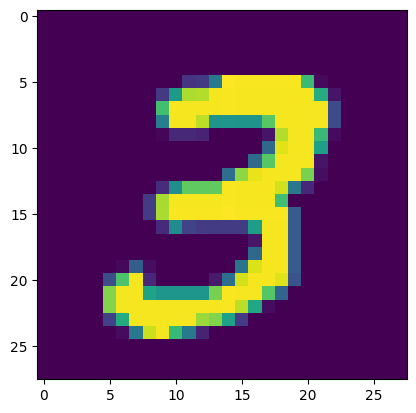

In [2]:
transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset=torchvision.datasets.MNIST(root='./data', train= True, download= True, transform=transform)
testset=torchvision.datasets.MNIST(root= './data', train= False, download= True, transform=transform)

batch_size=32

trainloader= torch.utils.data.DataLoader(trainset, batch_size=batch_size, drop_last= True, shuffle= True)
testloader=torch.utils.data.DataLoader(testset, batch_size=batch_size, drop_last= True, shuffle= True)

#import matplotlib.pyplot as plt

#plt.imshow(trainset.data[7])
#plt.show()

## Task 2: Neural Network Architecture:
Define a feed forward network using nn.Module.

In [49]:
n=0
while n<3:
    n=int(input('How many layers do you want? (>2) '))
print(n)

4


In [50]:
class MNISTConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1= nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, 
                              stride=1, padding=1) 
        self.act1=nn.ReLU()
        
        for i in range(n):
            self.convi= nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
            self.pooli=nn.MaxPool2d(kernel_size=2)
            self.acti= nn.ReLU()
            
        self.pooli=nn.MaxPool2d(kernel_size=2)


        #(32, h, h)
        self.flat= nn.Flatten()
        self.fc3= nn.Linear(588, 512)
        self.act3= nn.ReLU()

        self.fc4= nn.Linear(512, 10)

    def forward(self, x):
        # input 1 x 28 x 28, output 3 x 28 x 28
        x=self.conv1(x)
        x=self.act1(x)
        
        x=self.convi(x)
        x=self.acti(x)
        x=self.pooli(x)

        x=self.flat(x)
        x=self.fc3(x)
        x=self.act3(x)
        x=self.fc4(x)
        return x

## Task 3 and 6: Loss function, optimazer and optimization

I'm optimizing here the models.
Model 1: has n+2 layers where n is the number given in input, lr=0.001.
Model 2: has 2+2, lr=0.001.
Model 3: has 2+2, lr=0.01, Adam optimizer.
Model 2: has 3+2, lr=0.01.
I set the number of epochs to 5 as the program takes a few time. However the accuracy is pretty high with 98.6% for the last model.


In [51]:
model=MNISTConvNet()
loss_fn=nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn=nn.CrossEntropyLoss()

n=2
model2=MNISTConvNet()
loss_fn=nn.CrossEntropyLoss()
optimizer2 = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
loss_fn=nn.CrossEntropyLoss()


model3=MNISTConvNet()
loss_fn=nn.CrossEntropyLoss()
optimizer3 = optim.Adam(model3.parameters(), lr=0.01)
loss_fn=nn.CrossEntropyLoss()

n=3
model4=MNISTConvNet()
loss_fn=nn.CrossEntropyLoss()
optimizer4 = optim.SGD(model4.parameters(), lr=0.01, momentum=0.9)
loss_fn=nn.CrossEntropyLoss()

## Task 4 and 5: Training and Testing

In [64]:
n_epochs=5
for epoch in range(n_epochs):
    losses=[]
    losses2=[]
    losses3=[]
    losses4=[]

    for inputs, labels in trainloader:
        y_pred=model(inputs)
        loss=loss_fn(y_pred, labels)
        losses.append(loss.item()) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred2=model2(inputs)
        loss2=loss_fn(y_pred2, labels)
        losses2.append(loss2.item()) 
        optimizer2.zero_grad()
        loss2.backward()
        optimizer2.step()

        y_pred3=model3(inputs)
        loss3=loss_fn(y_pred3, labels)
        losses3.append(loss3.item()) 
        optimizer3.zero_grad()
        loss3.backward()
        optimizer3.step()

        y_pred4=model4(inputs)
        loss4=loss_fn(y_pred4, labels)
        losses4.append(loss4.item()) 
        optimizer4.zero_grad()
        loss4.backward()
        optimizer4.step()
    print(f'Epoch {epoch+1} --> loss1={np.mean(losses)},  loss2={np.mean(losses2)},  loss3={np.mean(losses3)},  loss4={np.mean(losses4)}')
    acc= 0
    count=0
    acc2= 0
    count2=0
    acc3= 0
    count3=0
    acc4= 0
    count4=0
    for inputs, labels in testloader:
        y_pred= model(inputs)
        acc+= (torch.argmax(y_pred, 1)== labels).float().sum()
        count+=len(labels)

        y_pred2= model2(inputs)
        acc2+= (torch.argmax(y_pred2, 1)== labels).float().sum()
        count2+=len(labels)

        y_pred3= model3(inputs)
        acc3+= (torch.argmax(y_pred3, 1)== labels).float().sum()
        count3+=len(labels)

        y_pred4= model4(inputs)
        acc4+= (torch.argmax(y_pred4, 1)== labels).float().sum()
        count4+=len(labels)
    acc /= count
    acc2 /= count2
    acc3 /= count3
    acc4 /= count4
    print(f'Model1 accuracy= {acc*100}, Model2 accuracy={acc2*100}, Model3 accuracy={acc3*100}, Model4 accuracy={acc4*100}, in epoch {epoch+1}')

Epoch 1 --> loss1=0.07456328690995773,  loss2=0.06953446243281165,  loss3=0.06956424372843048,  loss4=0.022330602152370316
Model1 accuracy= 97.83653259277344, Model2 accuracy=97.76642608642578, Model3 accuracy=97.35577392578125, Model4 accuracy=98.45753479003906, in epoch 1
Epoch 2 --> loss1=0.06727867387893299,  loss2=0.06212817700750505,  loss3=0.062173006360660095,  loss4=0.015191885285127986
Model1 accuracy= 97.56610107421875, Model2 accuracy=97.666259765625, Model3 accuracy=97.33573913574219, Model4 accuracy=98.6278076171875, in epoch 2
Epoch 3 --> loss1=0.059379622105881574,  loss2=0.05371966057308018,  loss3=0.06403958243614716,  loss4=0.013558845629474733
Model1 accuracy= 97.93669891357422, Model2 accuracy=97.96675109863281, Model3 accuracy=97.15544891357422, Model4 accuracy=98.51762390136719, in epoch 3
Epoch 4 --> loss1=0.05607013768982142,  loss2=0.04919631836473321,  loss3=0.05555690675054277,  loss4=0.010571458494664936
Model1 accuracy= 98.056884765625, Model2 accuracy=98.

tensor(1)


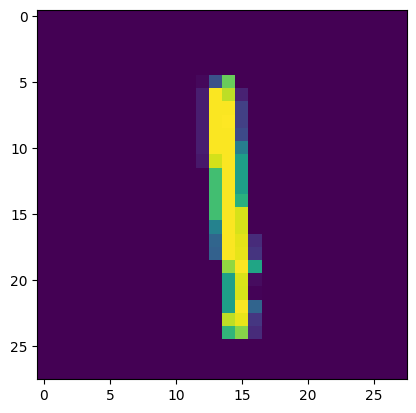

In [69]:
print(y_pred4[8].argmax())
import matplotlib.pyplot as plt
plt.imshow(trainset.data[8])
plt.show()